# Phase diagrams


This Jupyter notebook is designed to analyze and visualize phase diagrams from direct coexistence method in molecular dynamics simulation.
We use custom scripts from the file progs.analysis for that.

In [1]:
import sys

import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.colors as mcolors

import numpy as np

sys.path.append('..')
import progs.analysis as analysis


from decimal import getcontext
getcontext().prec = 50

## Rigid model with 3 patches

packing fraction profile

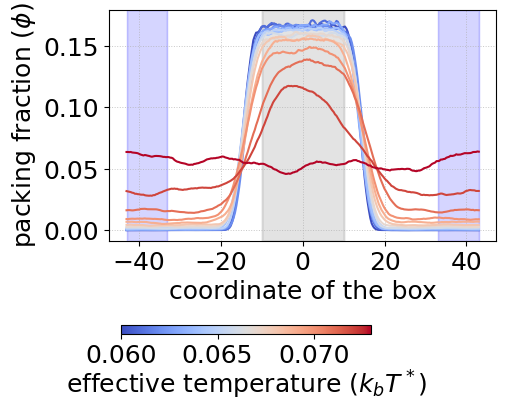

In [15]:
# Create a Phase_Diagram object with rigid patches
pd_rigid = analysis.Phase_Diagram('/share/scratch1/alena.taskina01/md/hoomd4/3patches/rigid/phases/', n_patches=3)

# Create a figure and axes for visualization
f, axs = plt.subplots(1, 1, figsize=(5,3))
mpl.rcParams['font.size'] = 18
axs.set_xlabel('coordinate of the box')
axs.set_ylabel('packing fraction ($\phi$)')

# Visualize the profiles using the Phase_Diagram object
pd_rigid.visualise_profiles(axs)

# Add a colorbar to the figure
kTs = pd_rigid.kTs
norm = mpl.colors.Normalize(vmin=min(kTs), vmax=max(kTs))
sm = mpl.pyplot.cm.ScalarMappable(cmap="coolwarm", norm=norm)
sm.set_array([])
cbar_ax = f.add_axes([0.15, -0.2, 0.5, 0.03]) 
cbar = f.colorbar(sm, cax=cbar_ax, orientation='horizontal')
cbar.set_label(r'effective temperature ($k_bT^*)$', rotation=0, labelpad=1)

# Add gridlines to the plot
axs.grid(True, which='both', linestyle=':', linewidth=0.7, alpha=0.7)

phase diagram

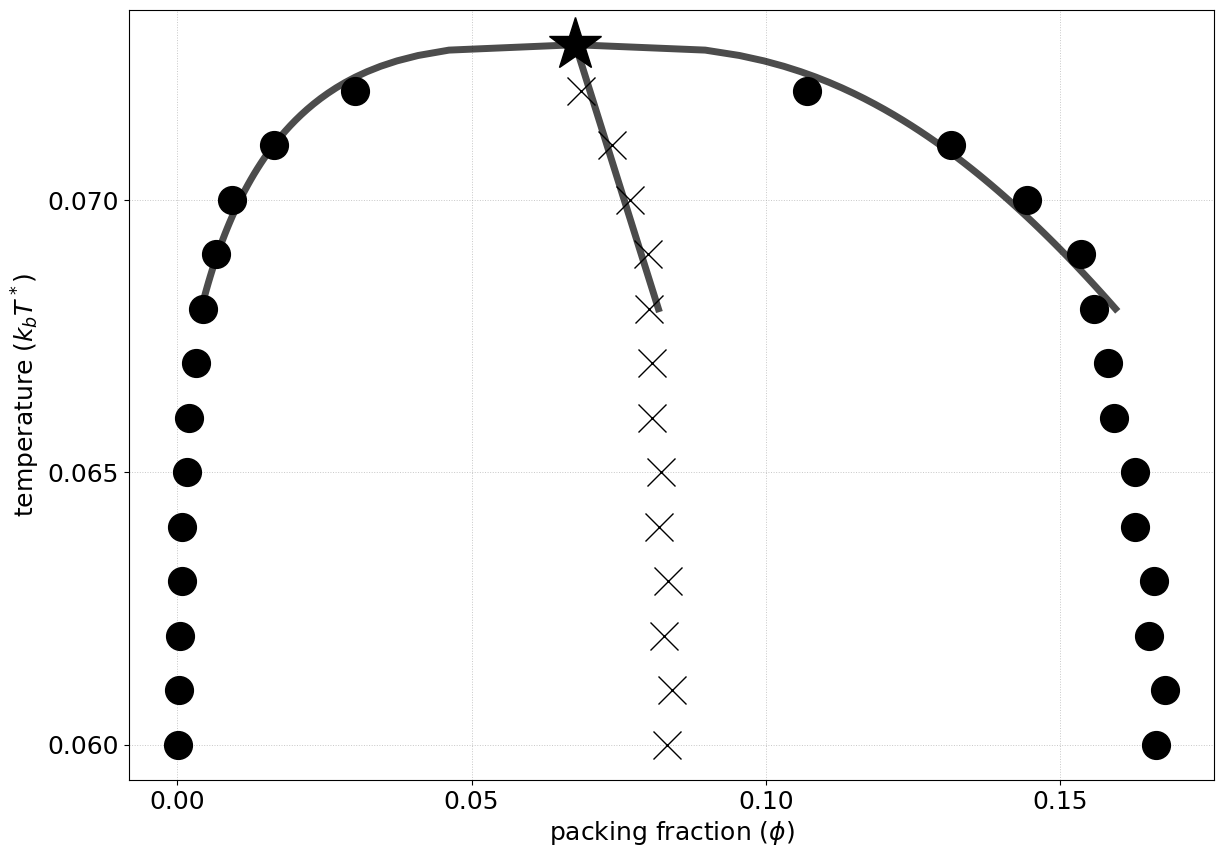

In [16]:
# Create a figure and axes for visualization
f, axs = plt.subplots(1, 1, figsize=(14,10))
mpl.rcParams['font.size'] = 50
axs.set_xlabel('packing fraction ($\phi$)')
axs.set_ylabel(r'temperature ($k_bT^*$)')
axs.grid(True, which='both', linestyle=':', linewidth=0.7, alpha=0.7)

# Plot the data points
axs.plot(pd_rigid.dilute_phi[:-1], pd_rigid.kTs[:-1], '.', color='k', markersize=40)
axs.plot(pd_rigid.condensed_phi[:-1], pd_rigid.kTs[:-1], '.', color='k', markersize=40)
axs.plot((np.array(pd_rigid.dilute_phi[:-1])+np.array(pd_rigid.condensed_phi[:-1]))/2, kTs[:-1], 'x', color='k', markersize=20)

# Get the critical point values
psic, Tc, s1, s2 = pd_rigid.get_critical_point(-6, -1)

# Plot the critical point and the fit lines
axs.plot(psic, Tc, '*', color='k', markersize=40)
axs.plot(psic + s2*(Tc-np.linspace(0.068, Tc)), np.linspace(0.068, Tc), 'k', alpha=0.7, linewidth=5)
axs.plot(psic + s2*(Tc-np.linspace(0.068, Tc)) + ((s1*(1-np.linspace(0.068, Tc)/Tc))**(1/3.06))/2, np.linspace(0.068, Tc), 'k', alpha=0.7, linewidth=5)
axs.plot(psic + s2*(Tc-np.linspace(0.068, Tc)) - ((s1*(1-np.linspace(0.068, Tc)/Tc))**(1/3.06))/2, np.linspace(0.068, Tc), 'k', alpha=0.7, linewidth=5)

## Different angle stiffnesses (k)

In [6]:
#extract phase diagrams from the simulation data
pd_k1 = analysis.Phase_Diagram('/share/scratch1/alena.taskina01/md/hoomd4/3patches/angles/k1/phases/', n_patches=3, phrase='reduced_equil_kT')
pd_k2 = analysis.Phase_Diagram('/share/scratch1/alena.taskina01/md/hoomd4/3patches/angles/k2/phases/', n_patches=3, phrase='equil1_kT')
pd_k10 = analysis.Phase_Diagram('/share/scratch1/alena.taskina01/md/hoomd4/3patches/angles/k10/phases/', n_patches=3, phrase='equil2_kT')
pd_k100 = analysis.Phase_Diagram('/share/scratch1/alena.taskina01/md/hoomd4/3patches/angles/k100/phases/', n_patches=3, phrase='equil_kT')
pd_k1000 = analysis.Phase_Diagram('/share/scratch1/alena.taskina01/md/hoomd4/3patches/angles/k1000/phases/', n_patches=3, phrase='equil_kT')

/tmp/ipykernel_317102/2129565274.py:37: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  f.tight_layout()


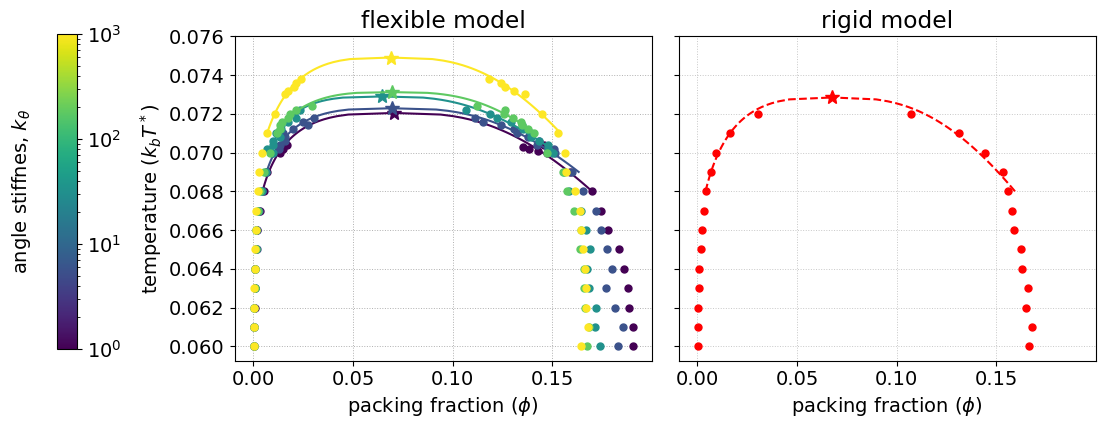

In [8]:
# Define a function to draw phase diagrams
def draw_pd(pd, ax, c, m, n, linestyle='-', label='', markersize=10):
    # Plot data points
    ax.plot(pd.dilute_phi[:-m], pd.kTs[:-m], '.', color=c, markersize=markersize, label=label)
    ax.plot(pd.condensed_phi[:-m], pd.kTs[:-m], '.', color=c, markersize=markersize)
    
    # Get critical point values
    psic, Tc, s1, s2 = pd.get_critical_point(-n, -m)
    
    # Plot critical point and fit lines
    ax.plot(psic, Tc, '*', color=c, markersize=markersize)
    ax.plot(psic + s2*(Tc-np.linspace(pd.kTs[-n], Tc)) + ((s1*(1-np.linspace(pd.kTs[-n], Tc)/Tc))**(1/3.06))/2, np.linspace(pd.kTs[-n], Tc), color=c, alpha=1, linestyle=linestyle)
    ax.plot(psic + s2*(Tc-np.linspace(pd.kTs[-n], Tc)) - ((s1*(1-np.linspace(pd.kTs[-n], Tc)/Tc))**(1/3.06))/2, np.linspace(pd.kTs[-n], Tc), color=c, alpha=1, linestyle=linestyle)
    
    return(Tc)

# Create a figure with two subplots
f, axs = plt.subplots(1, 2, figsize=(10, 4.5), sharex=True, sharey=True)
mpl.rcParams['font.size'] = 14
# Set grid properties and axis labels
axs[0].grid(True, which='both', linestyle=':', linewidth=0.7, alpha=1)
axs[1].grid(True, which='both', linestyle=':', linewidth=0.7, alpha=0.7)
axs[0].set_xlabel(r'packing fraction ($\phi$)')
axs[0].set_ylabel('temperature ($k_bT^*$)')
axs[1].set_xlabel('packing fraction ($\phi$)')
axs[0].set_title('flexible model')
axs[1].set_title('rigid model')
plt.yticks([0.06 + i*0.002 for i in range(9)])

# Define colors for plotting
colors = plt.cm.viridis(np.linspace(0, 1, 5))

# Create a colorbar
norm = mcolors.LogNorm(vmin=1, vmax=1000)
sm = plt.cm.ScalarMappable(cmap='viridis', norm=norm)
cbar_ax = f.add_axes([-0.06, 0.2, 0.02, 0.7]) 
cbar = f.colorbar(sm, cax=cbar_ax)
cbar.set_label(r'angle stiffness, $k_\theta$', rotation=90, labelpad=-80)

# Plot phase diagrams for different models
Tc_1 = draw_pd(pd_k1, axs[0], colors[0], 12, 19)
Tc_2 = draw_pd(pd_k2, axs[0], colors[1], 2, 13)
Tc_10 = draw_pd(pd_k10, axs[0], colors[2], 3, 15)
Tc_100 = draw_pd(pd_k100, axs[0], colors[3], 4, 11)
Tc_1000 = draw_pd(pd_k1000, axs[0], colors[4], 2, 9)
Tc_rigid = draw_pd(pd_rigid, axs[1], 'r', 1, 6, '--')

# Adjust layout
f.tight_layout()

## Rigid model with 3 vs 4 patches

In [9]:
pd_rigid4 = analysis.Phase_Diagram('/share/scratch1/alena.taskina01/md/hoomd4/4patches/phases/', n_patches=4)

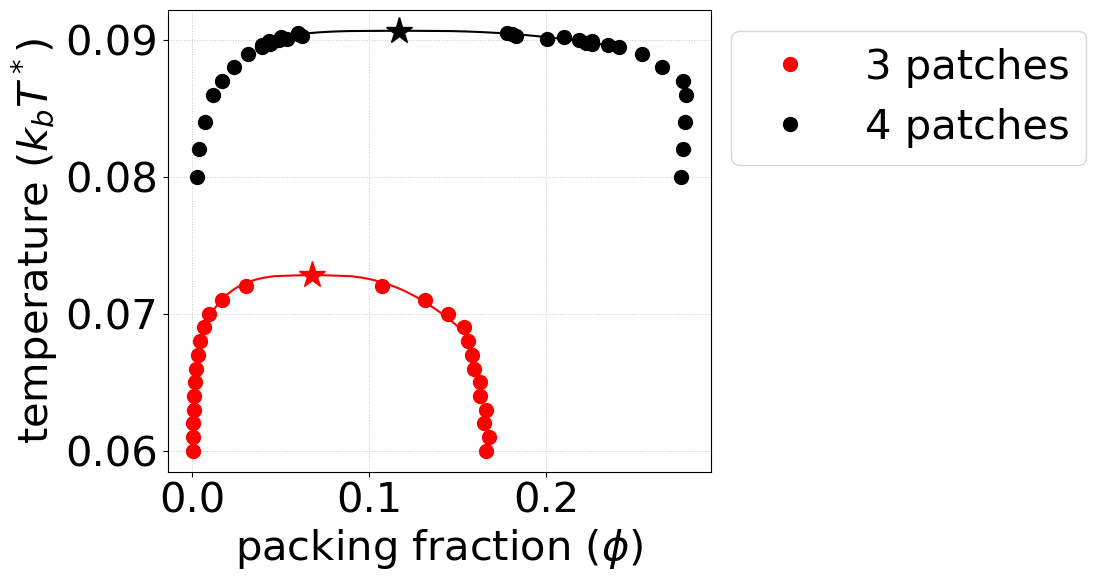

In [18]:
# Create a figure and axes for visualization
f, axs = plt.subplots(1, 1, figsize=(7,6))
mpl.rcParams['font.size'] = 30
axs.grid(True, which='both', linestyle=':', linewidth=0.7, alpha=0.7)
axs.set_xlabel(r'packing fraction ($\phi$)')
axs.set_ylabel(r'temperature ($k_bT^*$)')

# Plot phase diagrams for 3 patches and 4 patches
Tc_rigid = draw_pd(pd_rigid, axs, 'r', 1, 6, '-', '3 patches', 20)
Tc_rigid4 = draw_pd(pd_rigid4, axs, 'k', 4, 15, '-', '4 patches', 20)

# Add legend to the plot
plt.legend(bbox_to_anchor=(1,1))

In [25]:
Tc_1000

0.07490640482482736